## Analise de Dados sobre os dados do Portal Gov Execução Financeira PAA

Este arquivo contém informações financeiras e operacionais relacionadas ao Programa de Aquisição de Alimentos (PAA), um programa governamental voltado para a compra de alimentos da agricultura familiar e sua distribuição para populações em situação de vulnerabilidade.    
O PAA é uma iniciativa governamental voltada para a promoção da segurança alimentar e nutricional, além do fortalecimento da agricultura familiar. Os dados fornecem informações valiosas sobre a destinação de recursos, status dos planos operacionais e públicos beneficiados, como indígenas, quilombolas e comunidades vulneráveis.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caminho do arquivo
file_path = "./dataset/relatorio_finaceiro_PAA.xlsx"

# Carregar o arquivo Excel
df = pd.read_excel(file_path, engine="openpyxl", header=0)
df

,CÓDIGO IBGE,UF,ESTADO/MUNICÍPIO,TIPO ADESÃO,ANO DA PACTUAÇÃO,Nº DO PLANO OPERACIONAL,VIGÊNCIA,VALOR PACTUADO,VALOR PAGO,VALOR NÃO EXECUTADO,% DE EXECUÇÃO,ORIGEM DO ORÇAMENTO,STATUS,PÚBLICO ATENDIDO,DATA DE REFERÊNCIA
0,1200000,AC,Acre,Estadual,2023,4191,2025-07-18,3394479.14,3394479.10,0.04,1.000000,Recurso Ordinário do Ministério,LIBERADO,Amplo do PAA,2024-11-01
1,1200000,AC,Acre,Estadual,2023,4229,2025-11-30,4215000.00,0.00,4215000.00,0.000000,Recurso Crédito Extraordinário,LIBERADO,Indígenas,2024-11-01
2,1200000,AC,Acre,Estadual,2024,4503,2025-05-14,3660874.91,1449564.44,2211310.47,0.395961,Recurso Ordinário do Ministério,LIBERADO,Amplo do PAA,2024-11-01
3,1200385,AC,Plácido de Castro,Municipal,2023,4398,2025-12-12,105757.96,0.00,105757.96,0.000000,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
4,1200401,AC,Rio Branco,Municipal,2024,4616,2025-07-01,404801.62,0.00,404801.62,0.000000,Recurso Ordinário do Ministério,LIBERADO,Estratégia SAN,2024-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,3557105,SP,Votuporanga,Municipal,2024,4865,2025-07-15,175829.02,0.00,175829.02,0.000000,Recurso Ordinário do Ministério,LIBERADO,Edital PAA nº 13/2024,2024-11-01
858,1709500,TO,Gurupi,Municipal,2023,4501,2025-12-12,129882.17,129874.38,7.79,0.999940,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
859,1712801,TO,Maurilândia do Tocantins,Municipal,2023,4502,2025-12-12,100000.00,31836.60,68163.40,0.318366,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
860,1700000,TO,Tocantins,Estadual,2023,4237,2025-12-12,3000000.00,1887055.44,1112944.56,0.629018,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Estados),2024-11-01


# Relatorio Execução Financeira da PAA do Portal de Dados Gov

## 1 - Análise de Execução Financeira

#### Qual é a média, mediana e desvio padrão do percentual de execução financeira?

In [4]:
# Encontrando a média

media = df['% DE EXECUÇÃO'].mean() # Formula para encontrar a média da coluna % DE EXECUÇÃO
resultado = f'{media:.2f}' # Formatando para ter apenas 2 casas decimais da coluna % DE EXECUÇÃO
print(resultado)

0.42


In [5]:
# Encontrando a mediana
mediana = df['% DE EXECUÇÃO'].median()
result_mediana = f'{mediana:.2f}'
print(result_mediana)

0.34


In [6]:
# Econtrando o desvio padrão
desvio_padrao_execucao = df['% DE EXECUÇÃO'].std() # Formula para encontrar o desvio padrão da coluna % DE EXECUÇÃO
desvio_padrao_format = f'{desvio_padrao_execucao * 100:.2f}%' # Formatando para apenas 2 casas decimais da coluna % DE EXECUÇÃO
print(desvio_padrao_format)

41.74%


#### Quais são os estados com maior e menor execução financeira?

In [7]:
# Estados e municipios com maior execução financeira

best_execution = df.groupby('ESTADO/MUNICÍPIO')['% DE EXECUÇÃO'].max().reset_index().sort_values(by=['% DE EXECUÇÃO', 'ESTADO/MUNICÍPIO'], ascending=[False, True])
best_execution

,ESTADO/MUNICÍPIO,% DE EXECUÇÃO
640,São João da Baliza,1.0
516,Portel,1.0
20,Amapá,1.0
31,Anguera,1.0
90,Boa Vista do Tupim,1.0
...,...,...
705,Umbuzeiro,0.0
714,Viamão,0.0
716,Virmond,0.0
721,Votuporanga,0.0


In [8]:
# Estados e municipios com menor execução financeira

low_execution = df.groupby('ESTADO/MUNICÍPIO')['% DE EXECUÇÃO'].min().reset_index().sort_values(by=['% DE EXECUÇÃO', 'ESTADO/MUNICÍPIO'])
low_execution


,ESTADO/MUNICÍPIO,% DE EXECUÇÃO
4,Acre,0.0
5,Adrianópolis,0.0
8,Aiuaba,0.0
13,Almirante Tamandaré,0.0
14,Alta Floresta D'Oeste,0.0
...,...,...
552,Rio Real,1.0
604,Seringueiras,1.0
647,São João do Soter,1.0
516,Portel,1.0


#### Quais municípios receberam mais recursos, mas ainda não executaram os valores pactuados?

In [9]:
# Filtrar apenas registros de municípios
df_municipios = df[df["TIPO ADESÃO"] == "Municipal"]

# Ordenar os municípios pelos maiores valores não executados
df_municipios_sorted = df_municipios.sort_values(by="VALOR NÃO EXECUTADO", ascending=False)

# Selecionar as colunas relevantes
df_resultado = df_municipios_sorted[["ESTADO/MUNICÍPIO", "VALOR PACTUADO", "VALOR PAGO", "VALOR NÃO EXECUTADO"]]


# Exibir os 10 municípios com maior valor não executado
df_resultado.head(10)

,ESTADO/MUNICÍPIO,VALOR PACTUADO,VALOR PAGO,VALOR NÃO EXECUTADO
846,Guarulhos,6000000.00,3187872.73,2812127.27
197,Apicum-Açu,1800000.00,0.00,1800000.00
165,Maranguape,1595591.45,488646.92,1106944.53
852,São Paulo,1088523.84,0.00,1088523.84
720,Rio de Janeiro,1043601.71,0.00,1043601.71
787,Porto Alegre,986898.43,0.00,986898.43
718,Nova Iguaçu,2698283.08,1773416.58,924866.50
349,Sabará,1517069.58,649758.14,867311.44
206,Buriticupu,1186290.48,328009.67,858280.81
579,Serra Talhada,1000000.00,176442.81,823557.19


Explicação do Código  
A coluna TIPO ADESÃO identifica se o recurso é estadual ou municipal.

Usamos df[df["TIPO ADESÃO"] == "Municipal"] para manter apenas os municípios.

Ordenar pelo valor não executado:

sort_values(by="VALOR NÃO EXECUTADO", ascending=False) organiza os dados do maior para o menor valor não executado.

Selecionar as colunas necessárias:

Mantemos ESTADO/MUNICÍPIO, VALOR PACTUADO, VALOR PAGO e VALOR NÃO EXECUTADO.

Exibir os 10 primeiros resultados:

df_resultado.head(10) mostra os 10 municípios com maior valor não executado.


## Distribuição de Recursos

#### Qual é o total de recursos pactuados e pagos por estado?

In [10]:
# Colunas utilizadas para filtragem
# UF  # VALOR PACTUADO  # VALOR PAGO

# Soma total de recursos pactuado por UF
pactuado_uf = df.groupby('UF')['VALOR PACTUADO'].sum().reset_index().sort_values(by='VALOR PACTUADO', ascending=False)
pactuado_uf['VALOR PACTUADO'] = pactuado_uf['VALOR PACTUADO'].apply(lambda x: f'R${x:,.2f}') # Aplicando a formatação para moeda Real

#Soma total de recursos pagos por UF
value_total_uf = df.groupby('UF')['VALOR PAGO'].sum().reset_index().sort_values(by='VALOR PAGO', ascending=False)
value_total_uf['VALOR PAGO'] = value_total_uf['VALOR PAGO'].apply(lambda x: f'R${x:,.2f}') # Aplicando a formatação para moeda Real
juncao_table = pd.merge(left=pactuado_uf, right=value_total_uf) # Juncao das tabelas usando o pd.merge sendo a maior referenca a tabela lado 'left'
juncao_table


,UF,VALOR PACTUADO,VALOR PAGO
0,PA,"R$52,064,456.32","R$21,932,537.43"
1,BA,"R$47,529,904.17","R$29,769,208.93"
2,MG,"R$37,083,168.04","R$23,121,912.39"
3,MA,"R$35,492,098.67","R$14,511,533.04"
4,PE,"R$31,005,941.86","R$17,992,146.27"
5,AM,"R$28,484,399.10","R$15,181,613.92"
6,PB,"R$22,887,543.76","R$15,437,254.50"
7,SP,"R$22,165,703.37","R$10,945,487.16"
8,CE,"R$21,841,653.13","R$11,109,875.40"
9,PR,"R$20,930,994.17","R$2,823,970.31"


#### Quais tipos de adesão (Estadual vs. Municipal) receberam mais recursos?

In [11]:
# Formula para descobrir qual estado vs municipio recebe mais recursos

sum_state_municipal = df.groupby('TIPO ADESÃO')['VALOR PACTUADO'].sum().reset_index().sort_values(by='VALOR PACTUADO')

#Retirando a expressão e+ e colocando em moeda Real
sum_state_municipal['VALOR PACTUADO'] = sum_state_municipal['VALOR PACTUADO'].astype(int)
sum_state_municipal['VALOR PACTUADO'] = sum_state_municipal['VALOR PACTUADO'].apply(lambda x: f'R$ {x:,.2f}')
sum_state_municipal


,TIPO ADESÃO,VALOR PACTUADO
1,Municipal,"R$ 222,153,305.00"
0,Estadual,"R$ 280,754,543.00"


#### Qual é a distribuição do orçamento por origem do recurso?

In [12]:
# Ordenando a distribuição do orçamento por origem de recurso
# Vamos usar a Tabela 'Origem do Orçamento e 'Valor Pactuado'

# Agrupando as tabelas e somando com a ordenação por valores usando sort_values
order_origin = df.groupby('ORIGEM DO ORÇAMENTO')['VALOR PACTUADO'].sum().reset_index().sort_values(by='VALOR PACTUADO', ascending=False)
# Formatando o resultado do Valor Pactuado removendo a expressão e+
order_origin['VALOR PACTUADO'] = order_origin['VALOR PACTUADO'].astype(int) # Removendo a notação cientifica por valor muito extenso
order_origin['VALOR PACTUADO'] = order_origin['VALOR PACTUADO'].apply(lambda x: f'R$ {x:,.2f}') # Aplicando a formatação para valores em moeda Real
order_origin



,ORIGEM DO ORÇAMENTO,VALOR PACTUADO
4,Recurso Ordinário do Ministério,"R$ 249,635,689.00"
2,Recurso Crédito Extraordinário,"R$ 219,423,994.00"
3,Recurso Crédito Extraordinário - Ação 2792,"R$ 28,500,000.00"
0,Emenda Parlamentar Individual ( Impositiva),"R$ 4,648,165.00"
1,Emenda Parlamentar de Bancada,"R$ 700,000.00"


## Tendências Temporais

#### Como evoluiu o valor pactuado ao longo dos anos de pactuação?

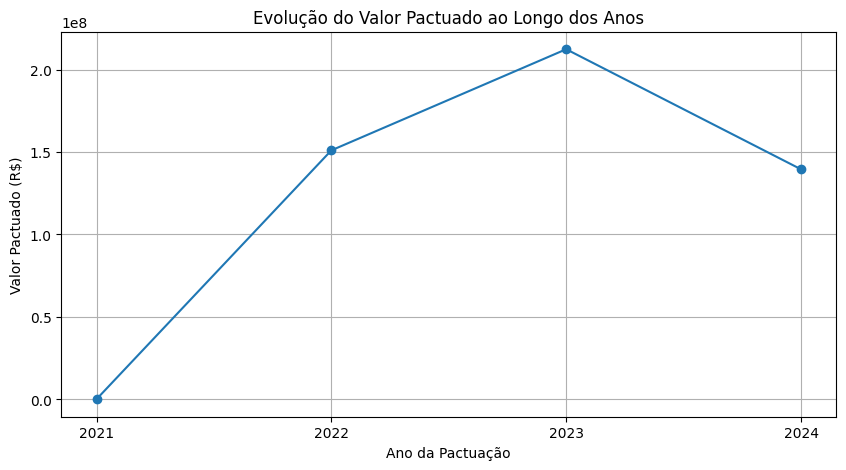

In [13]:
# Agrupar por ano e somar os valores pactuados
df_ano_pactuando = df.groupby('ANO DA PACTUAÇÃO')['VALOR PACTUADO'].sum().reset_index()
df_ano_pactuando['ANO DA PACTUAÇÃO'] = df_ano_pactuando['ANO DA PACTUAÇÃO'].apply(lambda x: f'{x:.0f}')

# Criando um grafico
plt.figure(figsize=(10, 5))
plt.plot(df_ano_pactuando["ANO DA PACTUAÇÃO"], df_ano_pactuando["VALOR PACTUADO"], marker='o', linestyle='-')
plt.xlabel("Ano da Pactuação")
plt.ylabel("Valor Pactuado (R$)")
plt.title("Evolução do Valor Pactuado ao Longo dos Anos")
plt.grid(True)
plt.show()

#### Qual a tendência de execução financeira por ano?

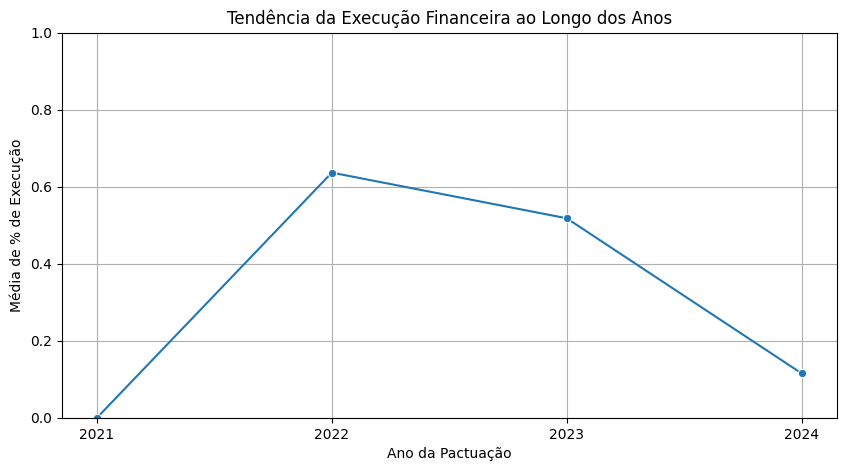

In [14]:
# Agrupar por ano e somar os valores pactuados
df_execucao = df.groupby('ANO DA PACTUAÇÃO')['% DE EXECUÇÃO'].mean().reset_index()
df_execucao['ANO DA PACTUAÇÃO'] = df_execucao['ANO DA PACTUAÇÃO'].apply(lambda x: f'{x:.0f}')

# Criando o grafico para analise

plt.figure(figsize=(10, 5))
sns.lineplot(x="ANO DA PACTUAÇÃO", y="% DE EXECUÇÃO", data=df_execucao, marker="o")
plt.xlabel("Ano da Pactuação")
plt.ylabel("Média de % de Execução")
plt.title("Tendência da Execução Financeira ao Longo dos Anos")
plt.ylim(0, 1)  # Como é um percentual, limitamos de 0 a 1 (100%)
plt.grid(True)
plt.show()

#### Há padrões na vigência dos planos operacionais?

In [15]:
df.head(5)


,CÓDIGO IBGE,UF,ESTADO/MUNICÍPIO,TIPO ADESÃO,ANO DA PACTUAÇÃO,Nº DO PLANO OPERACIONAL,VIGÊNCIA,VALOR PACTUADO,VALOR PAGO,VALOR NÃO EXECUTADO,% DE EXECUÇÃO,ORIGEM DO ORÇAMENTO,STATUS,PÚBLICO ATENDIDO,DATA DE REFERÊNCIA
0,1200000,AC,Acre,Estadual,2023,4191,2025-07-18,3394479.14,3394479.10,0.04,1.000000,Recurso Ordinário do Ministério,LIBERADO,Amplo do PAA,2024-11-01
1,1200000,AC,Acre,Estadual,2023,4229,2025-11-30,4215000.00,0.00,4215000.00,0.000000,Recurso Crédito Extraordinário,LIBERADO,Indígenas,2024-11-01
2,1200000,AC,Acre,Estadual,2024,4503,2025-05-14,3660874.91,1449564.44,2211310.47,0.395961,Recurso Ordinário do Ministério,LIBERADO,Amplo do PAA,2024-11-01
3,1200385,AC,Plácido de Castro,Municipal,2023,4398,2025-12-12,105757.96,0.00,105757.96,0.000000,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
4,1200401,AC,Rio Branco,Municipal,2024,4616,2025-07-01,404801.62,0.00,404801.62,0.000000,Recurso Ordinário do Ministério,LIBERADO,Estratégia SAN,2024-11-01


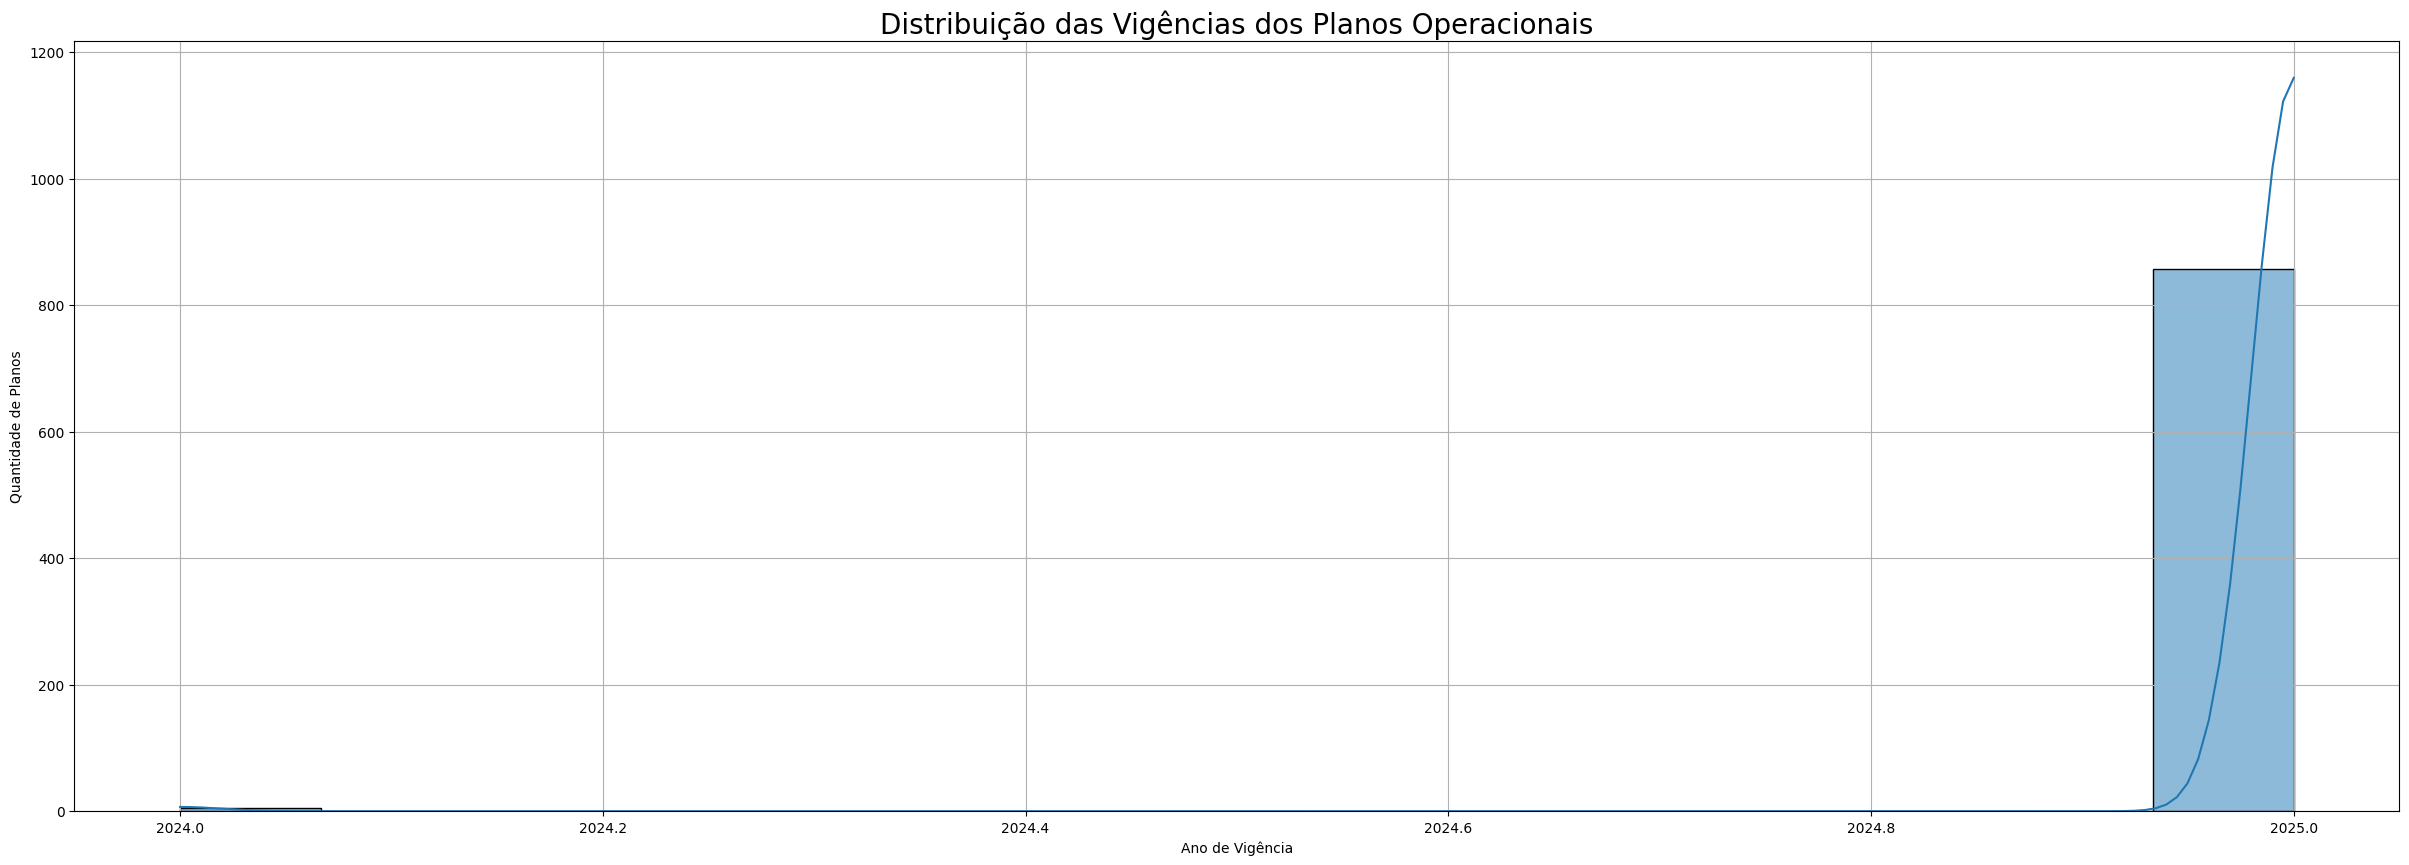

In [16]:
# Convertendo a coluna para formato de datas
df["VIGÊNCIA"] = pd.to_datetime(df["VIGÊNCIA"], errors="coerce")

# Criar histograma de vigências
plt.figure(figsize=(30, 10))
sns.histplot(df["VIGÊNCIA"].dt.year.dropna(), bins=15, kde=True)
plt.xlabel("Ano de Vigência")
plt.ylabel("Quantidade de Planos")
plt.title("Distribuição das Vigências dos Planos Operacionais", fontsize=20)
plt.grid(True)
plt.show()

## Público Atendido

#### Quais públicos atendidos receberam mais recursos?

In [17]:
df

,CÓDIGO IBGE,UF,ESTADO/MUNICÍPIO,TIPO ADESÃO,ANO DA PACTUAÇÃO,Nº DO PLANO OPERACIONAL,VIGÊNCIA,VALOR PACTUADO,VALOR PAGO,VALOR NÃO EXECUTADO,% DE EXECUÇÃO,ORIGEM DO ORÇAMENTO,STATUS,PÚBLICO ATENDIDO,DATA DE REFERÊNCIA
0,1200000,AC,Acre,Estadual,2023,4191,2025-07-18,3394479.14,3394479.10,0.04,1.000000,Recurso Ordinário do Ministério,LIBERADO,Amplo do PAA,2024-11-01
1,1200000,AC,Acre,Estadual,2023,4229,2025-11-30,4215000.00,0.00,4215000.00,0.000000,Recurso Crédito Extraordinário,LIBERADO,Indígenas,2024-11-01
2,1200000,AC,Acre,Estadual,2024,4503,2025-05-14,3660874.91,1449564.44,2211310.47,0.395961,Recurso Ordinário do Ministério,LIBERADO,Amplo do PAA,2024-11-01
3,1200385,AC,Plácido de Castro,Municipal,2023,4398,2025-12-12,105757.96,0.00,105757.96,0.000000,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
4,1200401,AC,Rio Branco,Municipal,2024,4616,2025-07-01,404801.62,0.00,404801.62,0.000000,Recurso Ordinário do Ministério,LIBERADO,Estratégia SAN,2024-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,3557105,SP,Votuporanga,Municipal,2024,4865,2025-07-15,175829.02,0.00,175829.02,0.000000,Recurso Ordinário do Ministério,LIBERADO,Edital PAA nº 13/2024,2024-11-01
858,1709500,TO,Gurupi,Municipal,2023,4501,2025-12-12,129882.17,129874.38,7.79,0.999940,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
859,1712801,TO,Maurilândia do Tocantins,Municipal,2023,4502,2025-12-12,100000.00,31836.60,68163.40,0.318366,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Municípios),2024-11-01
860,1700000,TO,Tocantins,Estadual,2023,4237,2025-12-12,3000000.00,1887055.44,1112944.56,0.629018,Recurso Crédito Extraordinário,LIBERADO,Região Norte (Estados),2024-11-01


In [18]:
atendimento_total = df.groupby('PÚBLICO ATENDIDO')['VALOR PACTUADO'].sum().reset_index().sort_values(by='VALOR PACTUADO', ascending=False)
atendimento_total['VALOR PACTUADO'] = atendimento_total['VALOR PACTUADO'].astype(int)
atendimento_total['VALOR PACTUADO'] = atendimento_total['VALOR PACTUADO'].apply(lambda x: f'R$ {x:,.2f}')
atendimento_total

,PÚBLICO ATENDIDO,VALOR PACTUADO
0,Amplo do PAA,"R$ 304,488,810.00"
6,Indígenas,"R$ 47,715,000.00"
3,Edital PAA nº 13/2024,"R$ 46,860,511.00"
7,Quilombolas,"R$ 22,500,000.00"
8,Região Norte (Estados),"R$ 20,000,000.00"
9,Região Norte (Municípios),"R$ 17,969,274.00"
5,Estratégia SAN,"R$ 16,064,851.00"
4,Edital PAA nº 9/2023,"R$ 10,760,856.00"
10,Região Sul (Municípios),"R$ 9,542,946.00"
2,Cozinhas Com. e Sol.,"R$ 5,805,600.00"


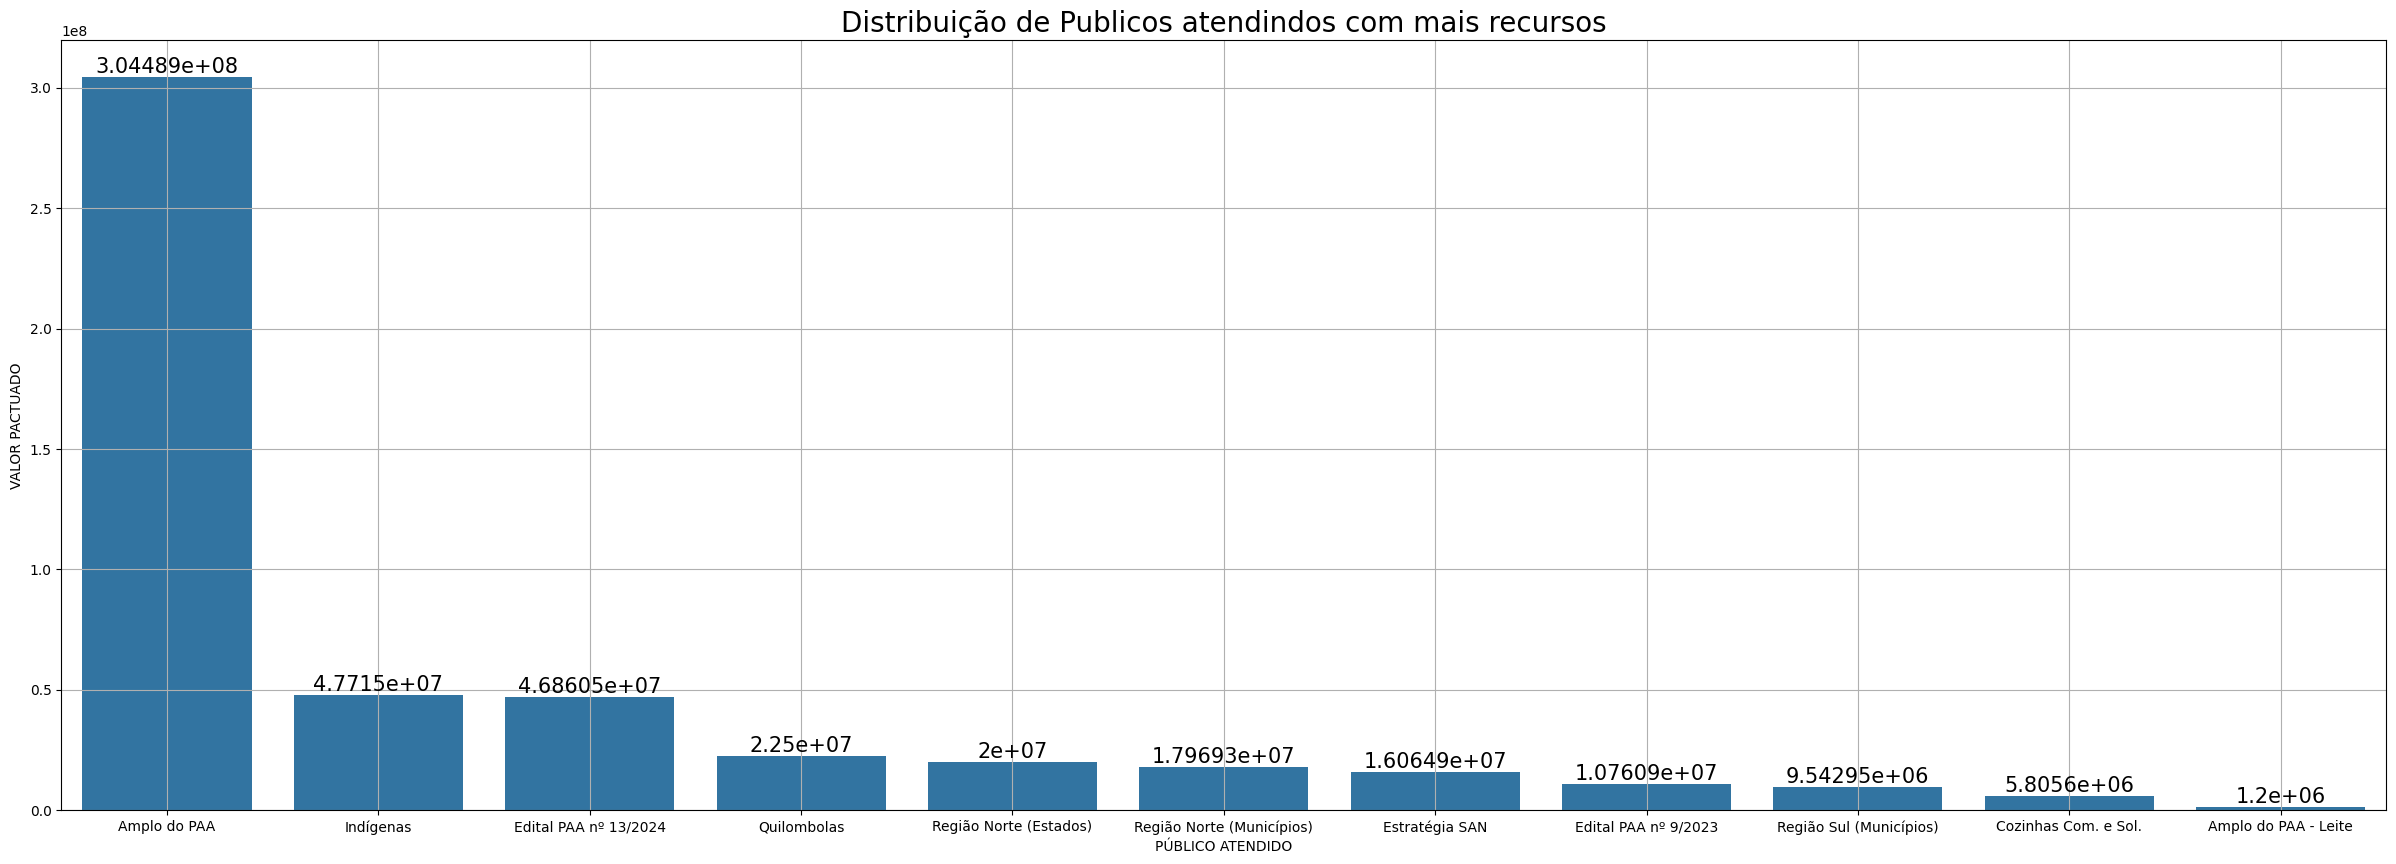

In [19]:
atendimento_total = df.groupby('PÚBLICO ATENDIDO')['VALOR PACTUADO'].sum().reset_index().sort_values(by='VALOR PACTUADO', ascending=False)
atendimento_total['VALOR PACTUADO'] = atendimento_total['VALOR PACTUADO'].astype(int)
atendimento_total
# Criando um grafico de coluna
plt.figure(figsize=(30, 10))
ax = sns.barplot(atendimento_total, x=atendimento_total["PÚBLICO ATENDIDO"], y=atendimento_total["VALOR PACTUADO"], estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=15);
plt.xlabel("PÚBLICO ATENDIDO")
plt.ylabel("VALOR PACTUADO")
plt.title("Distribuição de Publicos atendindos com mais recursos", fontsize=20)
plt.grid(True)
plt.show()

#### Existe diferença na execução financeira entre diferentes públicos atendidos?

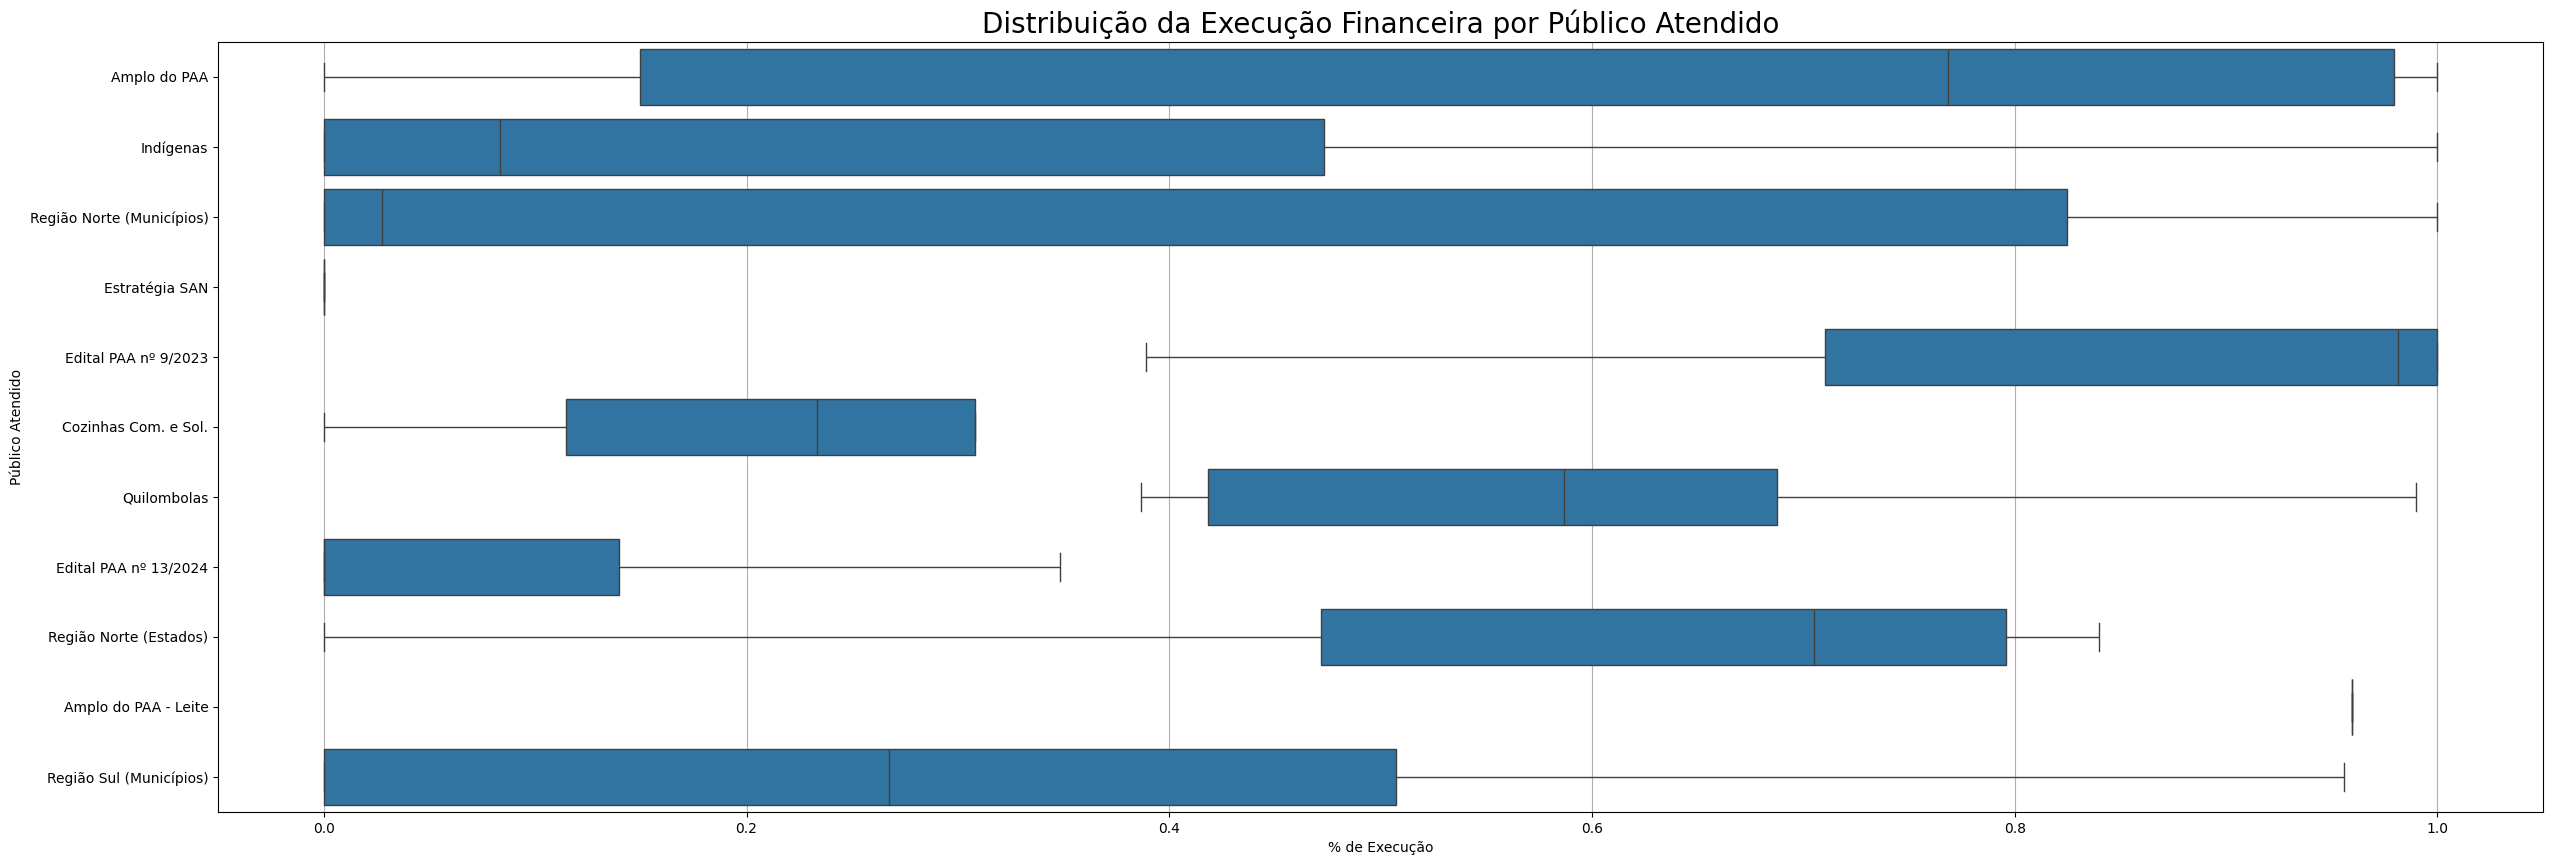

In [20]:
 # Remover valores nulos na coluna % DE EXECUÇÃO
df.dropna(subset=["% DE EXECUÇÃO"])

# Criar um boxplot para visualizar a variação da execução financeira por público atendido
plt.figure(figsize=(30, 10))
sns.boxplot(x="% DE EXECUÇÃO", y="PÚBLICO ATENDIDO", data=df, orient="h", showfliers=False)
plt.xlabel("% de Execução")
plt.ylabel("Público Atendido")
plt.title("Distribuição da Execução Financeira por Público Atendido", fontsize=20)
plt.grid(axis="x")
plt.show()